In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import DistanceMetric
from time import perf_counter

In [2]:
df_fraud = pd.read_csv('./../data_analyse/DATA/Fraud_Data.csv')
df_ip = pd.read_csv('./../data_analyse/DATA/IpAddress_to_Country.csv')

In [3]:
def lookup_country(ip):
    tmp = df_ip[(df_ip['lower_bound_ip_address']<ip) & (df_ip['upper_bound_ip_address']>=ip)]['country']
    if len(tmp):
        return tmp.tolist()[0]
    else:
        return 'NULL'

df_fraud['country'] = df_fraud.apply(lambda row: lookup_country(row['ip_address']), axis=1)

df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NULL
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [4]:
df_fraud

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NULL
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States


In [5]:
from datetime import datetime
purchase = df_fraud['purchase_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
signup = df_fraud['signup_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df_fraud['time_diff'] = purchase - signup
df_fraud['time_diff'] = df_fraud['time_diff'].apply(lambda x: x.seconds)
df_fraud

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NULL,60085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States,77233
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands,67270
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan,28816
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States,48519


In [6]:
device_num = df_fraud[['user_id', 'device_id']].groupby('device_id').count().reset_index()
device_num = device_num.rename(columns={'user_id': 'device_num'})
df_fraud = df_fraud.merge(device_num, how='left', on='device_id')
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff,device_num
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NULL,60085,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461,1


In [7]:
ip_address = df_fraud[['user_id', 'ip_address']].groupby('ip_address').count().reset_index()
ip_address= ip_address.rename(columns={'user_id': 'ip_num'})
df_fraud = df_fraud.merge(ip_address, how='left', on='ip_address')
df_fraud.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff,device_num,ip_num
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NULL,60085,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461,1,1


ignup_day 	signup_week 	purchase_day 	purchase_week

df_fraud['signup_month'] = data.signup_time.apply(lambda x: x.month)
data['signup_day'] = data.signup_time.apply(lambda x: x.day)
data['signup_hour'] = data.signup_time.apply(lambda x: x.hour)
data['signup_minute'] = data.signup_time.apply(lambda x: x.minute)

data['purchase_month'] = data.purchase_time.apply(lambda x: x.month)
data['purchase_day'] = data.purchase_time.apply(lambda x: x.day)
data['purchase_hour'] = data.purchase_time.apply(lambda x: x.hour)
data['purchase_minute'] = data.purchase_time.apply(lambda x: x.minute)

In [12]:
df_fraud['signup_time'] = pd.to_datetime(df_fraud['signup_time'])
df_fraud['signup_day'] = df_fraud['signup_time'].dt.dayofweek
df_fraud['signup_week'] = df_fraud['signup_time'].dt.week 
df_fraud['purchase_time'] = pd.to_datetime(df_fraud['purchase_time'])
df_fraud['purchase_day'] = df_fraud['purchase_time'].dt.dayofweek
df_fraud['purchase_week'] = df_fraud['purchase_time'].dt.week 
df_fraud

<ipython-input-12-57ccbdb17f85>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_fraud['signup_week'] = df_fraud['signup_time'].dt.week
<ipython-input-12-57ccbdb17f85>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_fraud['purchase_week'] = df_fraud['purchase_time'].dt.week


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff,device_num,ip_num,signup_day,signup_week,purchase_day,purchase_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882,1,1,1,9,5,16
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944,1,1,6,23,0,24
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,12,12,3,1,3,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NULL,60085,1,1,1,18,0,19
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461,1,1,1,30,2,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States,77233,2,1,1,5,6,13
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands,67270,1,1,4,20,1,22
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan,28816,1,1,1,10,2,21
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States,48519,2,1,3,28,0,37


signup_day 	signup_week 	purchase_day 	purchase_week 	purchase_value 	source 	browser 	sex 	age 	country 	time_diff 	device_num 	ip_num 	class

data = df_fraud[['signup_day', 'signup_week', 	'purchase_day', 	'purchase_week' ,	'purchase_value' ,	'source', 	'browser', 	'sex', 	'age', 	'country', 	'time_diff', 	'device_num', 	'ip_num', 	'class']]
data

In [14]:
y = df_fraud['class']
data = df_fraud.drop(['user_id','signup_time','purchase_time','class', 'device_id' ], axis=1)
X = data
X.isnull().sum()

purchase_value    0
source            0
browser           0
sex               0
age               0
ip_address        0
country           0
time_diff         0
device_num        0
ip_num            0
signup_day        0
signup_week       0
purchase_day      0
purchase_week     0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151112 entries, 0 to 151111
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   purchase_value  151112 non-null  int64  
 1   source          151112 non-null  object 
 2   browser         151112 non-null  object 
 3   sex             151112 non-null  object 
 4   age             151112 non-null  int64  
 5   ip_address      151112 non-null  float64
 6   country         151112 non-null  object 
 7   time_diff       151112 non-null  int64  
 8   device_num      151112 non-null  int64  
 9   ip_num          151112 non-null  int64  
 10  signup_day      151112 non-null  int64  
 11  signup_week     151112 non-null  int64  
 12  purchase_day    151112 non-null  int64  
 13  purchase_week   151112 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 21.3+ MB


In [16]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
X['source'] = lb.fit_transform(X['source'])
X['sex'] = lb.fit_transform(X['sex'])
X['browser'] = lb.fit_transform(X['browser'])
X['country'] = lb.fit_transform(X['country'])
X.head()

,purchase_value,source,browser,sex,age,ip_address,country,time_diff,device_num,ip_num,signup_day,signup_week,purchase_day,purchase_week
0,34,2,0,1,39,7.327584e+08,84,13882,1,1,1,9,5,16
1,16,0,0,0,53,3.503114e+08,172,17944,1,1,6,23,0,24
2,15,2,3,1,53,2.621474e+09,172,1,12,12,3,1,3,1
3,44,2,4,1,41,3.840542e+09,115,60085,1,1,1,18,0,19
4,39,0,4,1,45,4.155831e+08,172,41461,1,1,1,30,2,37


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [18]:
from sklearn.ensemble import RandomForestClassifier
cls_forest = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth = 50 , min_samples_leaf = 3, min_samples_split = 3, oob_score = True  )
cls_forest.fit(X_train, y_train)

C:\Users\Mathias\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mathias\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=20, oob_score=True)

In [20]:
from sklearn.metrics import classification_report
predi = cls_forest.predict(X_test)
predi
print(classification_report(y_test, predi))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     34162
           1       0.99      0.54      0.70      3616

    accuracy                           0.96     37778
   macro avg       0.97      0.77      0.84     37778
weighted avg       0.96      0.96      0.95     37778



La précison se fait par ligne soit 0.95 sur les true et 0.99 sur les false (basé sur matrice true false, true positif etc  ) la il ne reconnait que 54 % des mec qui fraude , à l'inverse il ne confond pas les non fraude 


In [21]:
imp = cls_forest.feature_importances_
imp 

array([0.04953392, 0.01035894, 0.01732231, 0.0083007 , 0.04517886,
       0.06233977, 0.02860368, 0.2710788 , 0.09401972, 0.09441874,
       0.02401512, 0.04924407, 0.02441516, 0.22117019])

In [22]:
data.columns.values[:-1]

array(['purchase_value', 'source', 'browser', 'sex', 'age', 'ip_address',
       'country', 'time_diff', 'device_num', 'ip_num', 'signup_day',
       'signup_week', 'purchase_day'], dtype=object)

In [24]:
feature_importances = pd.DataFrame(cls_forest.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

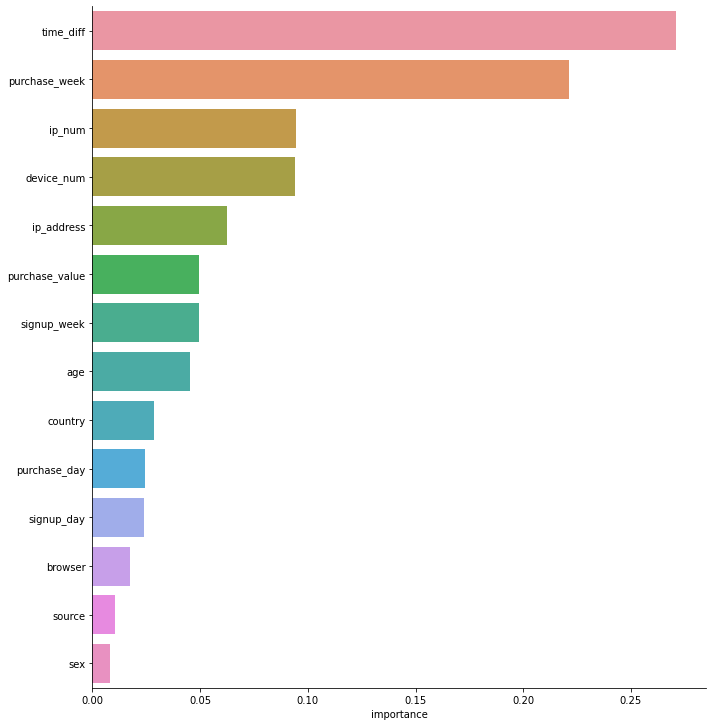

In [25]:
sns.catplot(x=feature_importances['importance'], y=feature_importances['importance'].index,kind="bar", data=feature_importances, height=10)

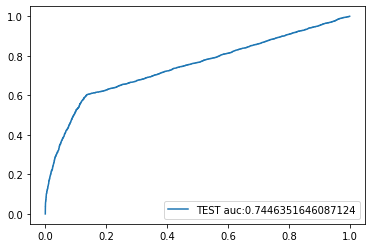

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import metrics

clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="TEST auc:"+str(auc))
plt.legend(loc=4)
plt.show()

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy').mean()
print("L'accuracy moyenne pour 10 'fold cross validation' est {}%".format(round(scores*100,2)))


feature_imp = pd.Series(clf.feature_importances_,index=columns[:-1]).sort_values(ascending=False)
feature_imp
columns = ['signup_day', 'signup_week', 'purchase_day', 'purchase_week', 'purchase_value', 'source', 
           'browser', 'sex', 'age', 'country', 'time_diff', 'device_num', 'ip_num', 'class']


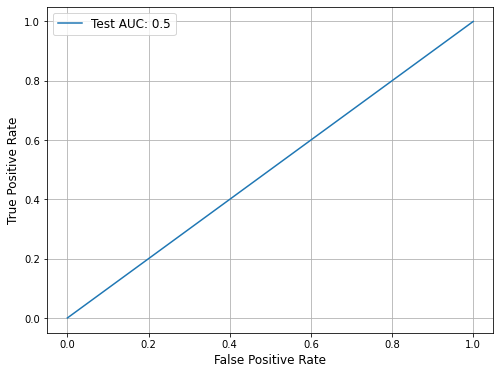

In [35]:
test_fpr, test_tpr, _ = metrics.roc_curve(y_test.values, y_pred)
test_auc = np.round(metrics.auc(test_fpr, test_tpr), 3)
test_fpr = np.insert(test_fpr, 0, 0)
test_tpr = np.insert(test_tpr, 0, 0)

fig, ax = plt.subplots(figsize=(8, 6))
#ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
#ax.plot(test_fpr, test_tpr, 'k--', label='Chance Curve')
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.grid(True)
ax.legend(fontsize=12)
plt.show()
